<a href="https://colab.research.google.com/github/thinkp0907/Ml_yahac/blob/master/ml_yahac_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hidden Layer
### 인공신경망
- 여러개의 perceptron을 연결하여 진짜 신경망 Deep Learning 구현
- Input Layer와 Output Layer 사이에 여러개의 Perceptron Hidden Layer를 추가
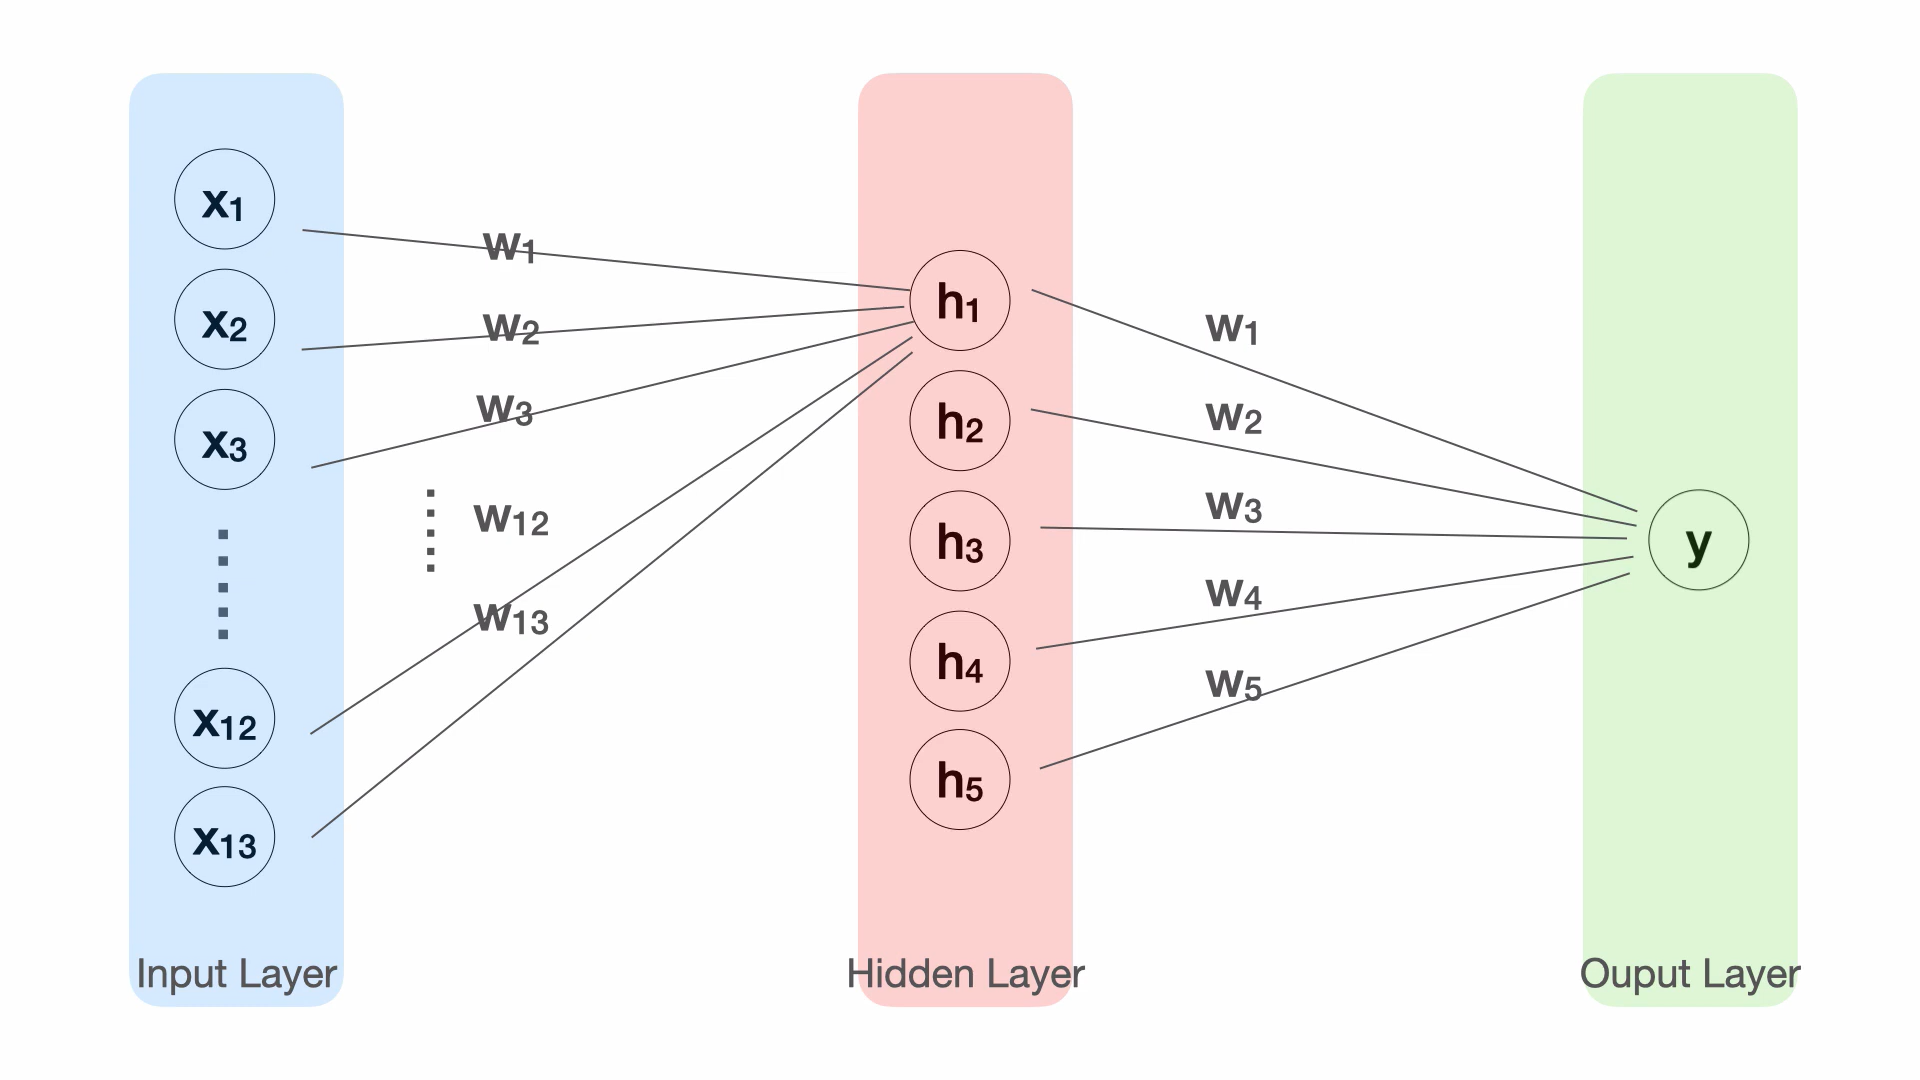

- 기존 학습기 코드 
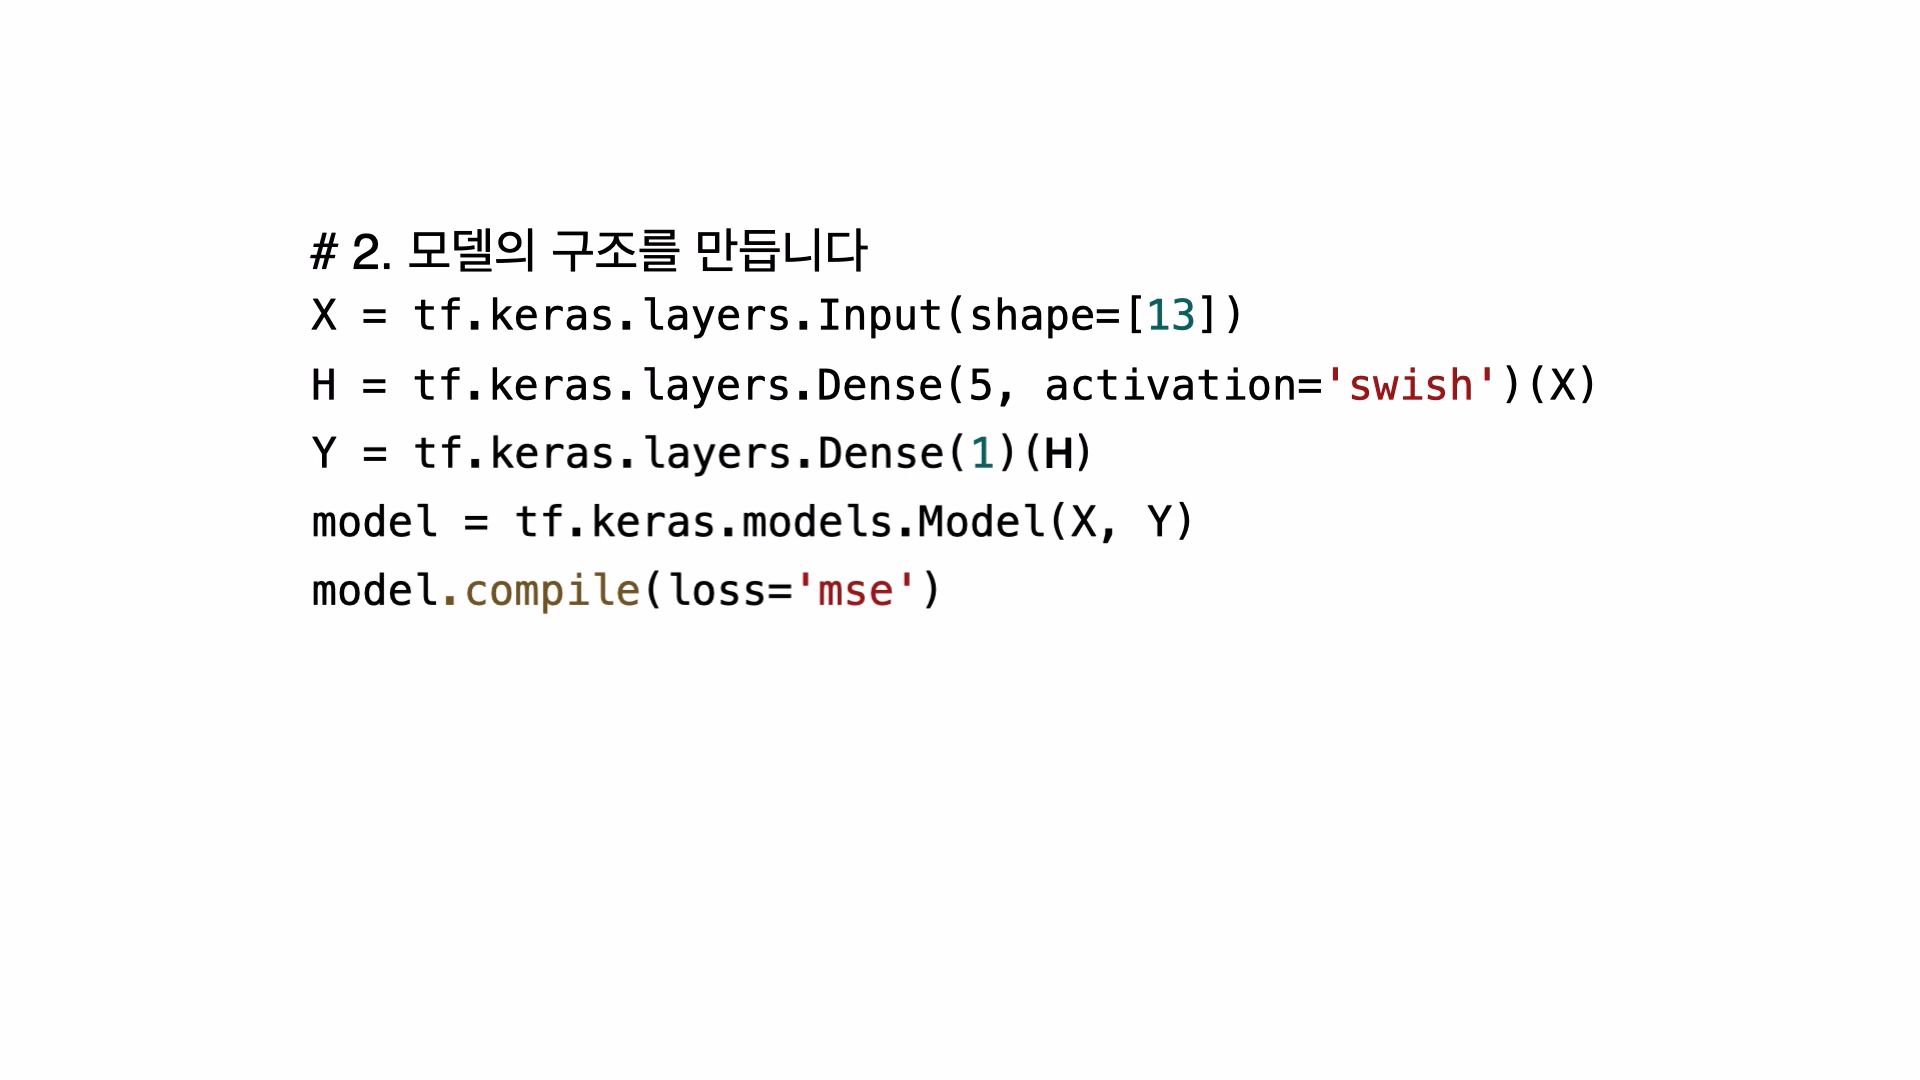

- 3개 층의 Hidden Layer를 가진 학습기 코드
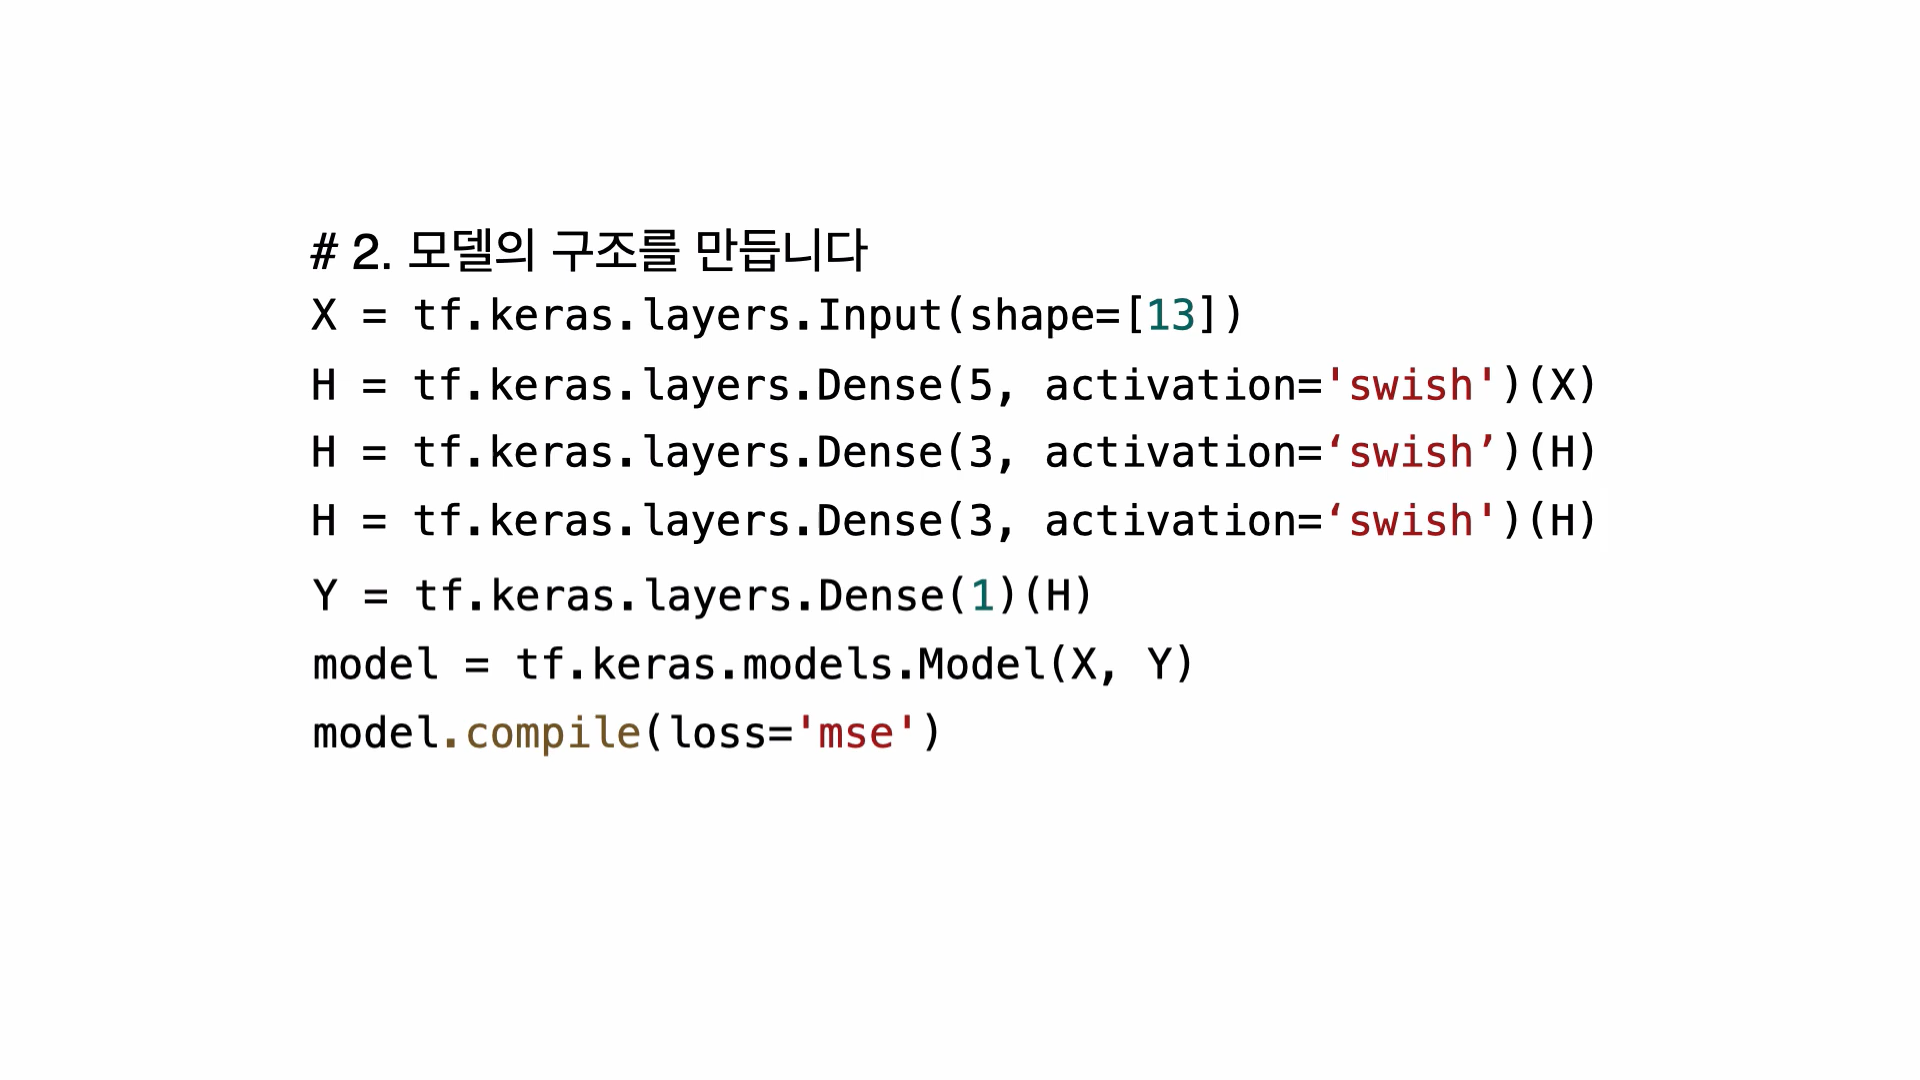

In [1]:
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

## 보스턴 집값 예측

In [2]:
# 1. 과거 데이터 준비
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
보스턴 = pd.read_csv(파일경로)

# 독립변수, 종속변수 분리
독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)


(506, 13) (506, 1)


In [4]:
# 모델의 구조를 만들기
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(10, activation='swish')(X)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')

In [11]:
# 모델 학습시키기
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)


Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 15.7389
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 17.2781
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 16.2774
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 16.6645
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 16.0676
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 15.9391
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 16.9309
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 15.7151
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 16.7536
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 16.5417


In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 4. 모델을 이용
model.predict(독립[:5])

array([[27.756527],
       [23.85031 ],
       [30.613306],
       [30.232986],
       [30.82796 ]], dtype=float32)

In [13]:
종속[:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 아이리스 품종 분류

In [14]:
# 1. 과거 데이터 준비
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스 = pd.read_csv(파일경로)
display(아이리스.head())

# 원핫인코딩
아이리스 = pd.get_dummies(아이리스)
display(아이리스.head())

# 독립변수(원인), 종속변수(결과) 나누기
독립 = 아이리스[['꽃잎길이','꽃잎폭','꽃받침길이','꽃받침폭']]
종속 = 아이리스[['품종_setosa','품종_versicolor','품종_virginica']]
print(독립.shape, 종속.shape)

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


(150, 4) (150, 3)


In [16]:
# 2. 모델의 구조를 만들기
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',
              metrics='accuracy')

In [22]:
# 3.데이터로 모델 학습
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)


Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9800
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9800
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9800
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9867
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9800
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9867


In [23]:
# 4. 모델을 이용햐기
print(model.predict(독립[:5]))
print(종속[:5])

[[1.00000000e+00 5.73122279e-13 3.22553445e-19]
 [1.00000000e+00 1.08929844e-10 3.80767945e-17]
 [1.00000000e+00 4.60846422e-12 5.40420876e-18]
 [1.00000000e+00 1.03106731e-10 1.23113764e-16]
 [1.00000000e+00 2.29395523e-13 2.34602872e-19]]
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0
1          1              0             0
2          1              0             0
3          1              0             0
4          1              0             0
